Install dependencies

In [1]:
!pip install -q transformers tweepy

     |████████████████████████████████| 5.8 MB 5.3 MB/s 
     |████████████████████████████████| 7.6 MB 54.2 MB/s 
     |████████████████████████████████| 182 kB 86.8 MB/s 


Twitter API

In [2]:
import tweepy
consumer_key = "**********"
consumer_pass = "**********************************"
#API
auth = tweepy.AppAuthHandler(consumer_key, consumer_pass)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Search

In [3]:
def handler(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            print("Reached Limit")
            time.sleep(15 * 61)
        except StopIteration:
            break

query = 'Artificial Intelligence'
query = query + ' -filter:retweets'

count = 500
search = handler(tweepy.Cursor(api.search,
                        q=query,
                        tweet_mode='extended',
                        lang='en',
                        result_type="recent").items(count))

Hugging Face Sentiment Analysis Transformer

In [4]:
from transformers import pipeline

sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

tweets = []
for tweet in search:
    try:
        content = tweet.full_text
        sentiment = sentiment_analysis(content)
        tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})

    except:
        pass

Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/540M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/843k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Explore Analysis

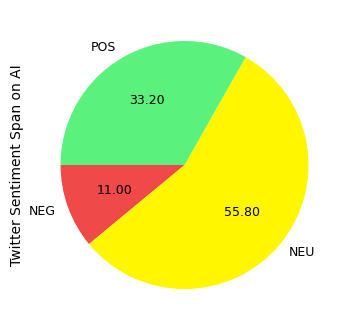

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('max_colwidth', None)
pd.set_option('display.width', 3000)
df = pd.DataFrame(tweets)
sentiment_counts = df.groupby(['sentiment']).size()

fig = plt.figure(figsize=(4,5), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%.2f', startangle=180, fontsize=9, label="Twitter Sentiment Span on AI", colors=['#EF4949', '#FFF600', '#5AF27D'])